# Load pdf files

In [1]:
from langchain_community.document_loaders import (
    PyPDFLoader,
    PyMuPDFLoader,
    UnstructuredPDFLoader
)

e:\Babu\ragudemy\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## PyPDFLoader

In [3]:
try:
    pypdf_loader = PyPDFLoader(
        file_path="data/pdf/attention.pdf"
    )
    pypdf_docs = pypdf_loader.load()
    print(f"Loaded {len(pypdf_docs)} pages")
    print(f"Page 1 content: {pypdf_docs[0].page_content[:100]}...")
    print(f"Metadata {pypdf_docs[0].metadata}")
except Exception as e:
    print(f"Exception occured: {str(e)}")
    raise Exception(str(e))

Loaded 15 pages
Page 1 content: Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and...
Metadata {'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'author': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'data/pdf/attention.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1'}


## PyMuPDFLoader (Fast and Accurate)

In [5]:
try:
    pymupdf_loader = PyMuPDFLoader(
        file_path="data/pdf/attention.pdf"
    )
    pymupdf_docs = pymupdf_loader.load()
    print(f"Loaded {len(pymupdf_docs)} pages")
    print(f"Page 1 content: {pymupdf_docs[0].page_content[:100]}...")
    print(f"Metadata {pymupdf_docs[0].metadata}")
except Exception as e:
    print(f"Exception occured: {str(e)}")
    raise Exception(str(e))

Loaded 15 pages
Page 1 content: Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and...
Metadata {'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'source': 'data/pdf/attention.pdf', 'file_path': 'data/pdf/attention.pdf', 'total_pages': 15, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'trapped': '', 'modDate': 'D:20240410211143Z', 'creationDate': 'D:20240410211143Z', 'page': 0}


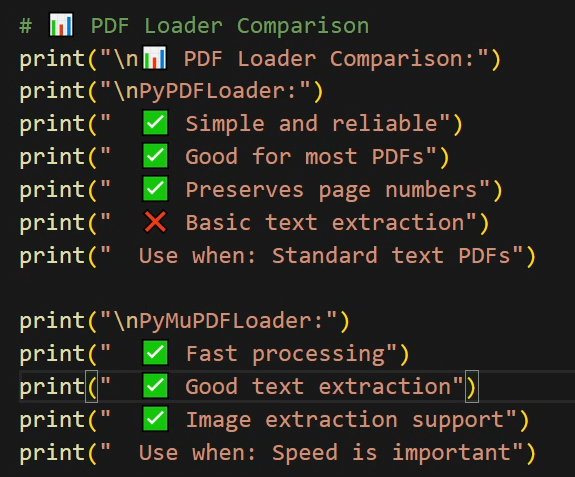

# Handling PDF Challenges

Purpose of this section PSDs are notoriously difficult to parse because they:
- Store text in complex ways (not just simple text)
- Can have formatting issues
- May contain scanned images (requiring OCR)
- Often have extraction artifacts

## Example of raw PDF extraction

In [ ]:
raw_

In [11]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

from langchain_core.documents import Document
from typing import List

In [14]:
class SmartPDFProcessor:
    """
    Advanced PDF processing with error handling
    """
    def __init__(self, chunk_size=1000, chunk_overlap = 100):
        self.chunk_size = chunk_size
        self.chunk_overlap = chunk_overlap
        self.text_splitter = RecursiveCharacterTextSplitter(
            chunk_size = self.chunk_size,
            chunk_overlap = self.chunk_overlap,
            separators=[" "]
        )

    def process_pdf(self, pdf_path: str) -> List[Document]:
        """
        Process PDF with smart chunking and metadata enhancement
        """
        # Load PDF
        loader = PyPDFLoader(pdf_path)
        pages = loader.load()

        # Process each page
        processed_chunks = []

        for page_num, page in enumerate(pages):
            # clean text
            cleaned_text = self._clean_text(page.page_content)

            if len(cleaned_text.strip()) < 50:
                continue

            chunks = self.text_splitter.create_documents(
                texts = [cleaned_text],
                metadatas=[{
                    **page.metadata,
                    "page": page_num + 1,
                    "total_pages": len(pages),
                    "chunk_method": "smart_pdf_processor",
                    "char_count": len(cleaned_text)
                }]
            )

            processed_chunks.extend(chunks)

        return processed_chunks
    
    def _clean_text(self, text: str) -> str:
        """
        clean extracted text
        """
        text = " ".join(text.split())

        # Fix common pdf extraction issues
        # text = text.replace("","fi")
        # text = text.replace("","fl")

        return text

In [16]:
preprocessor = SmartPDFProcessor()

In [18]:
# Process a pdf if available
try:
    smart_chunks = preprocessor.process_pdf("data/pdf/attention.pdf")
    print(f"Processed into {len(smart_chunks)} smart chunks")

    if smart_chunks:
        print("\nSample chunk metadata")
        for key, value in smart_chunks[0].metadata.items():
            print(f"    {key}:{value}")
except Exception as e:
    raise Exception(str(e))

Processed into 49 smart chunks

Sample chunk metadata
    producer:pdfTeX-1.40.25
    creator:LaTeX with hyperref
    creationdate:2024-04-10T21:11:43+00:00
    author:
    keywords:
    moddate:2024-04-10T21:11:43+00:00
    ptex.fullbanner:This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5
    subject:
    title:
    trapped:/False
    source:data/pdf/attention.pdf
    total_pages:15
    page:1
    page_label:1
    chunk_method:smart_pdf_processor
    char_count:2857
